<h3>Gaussian Function</h3>
A shifted Gaussian function has the following definition
$$
g(x) = e^{- \alpha (x - \beta)^2}
$$

In [1]:
import scipy.integrate as si
import numpy as np
import matplotlib.pyplot as plt

50 -50 100


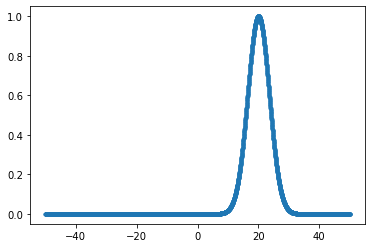

In [2]:
# region of interest
b = 50
a = -b
L = b - a
print(b, a, L)

# shifted Gaussian
alpha = 1/25
beta = 20
def gauss(x):
    return np.exp(-alpha * (x - beta)**2)

# plot Gaussian
Nx = 5000
x = np.linspace(-b, b, Nx)
plt.plot(x, gauss(x), '.')
plt.show()

<h3>Fourier Series</h3>

The Fourier series coefficients, $f_n$, are given by
$$
f_n = \int_a^b e^{-i k x} g(x) dx
$$
where $-\infty < n < \infty$.

The above integral can be evaluated using the error function as
$$
f_n = \frac{1}{2} \sqrt{\frac{\pi}{\alpha}} e^{-i k \beta } e^{-\frac{k^2}{4 \alpha}} \left[ -\mathrm{erf}\left( s_1^{\left( n \right)} \right) + \mathrm{erf} \left( s_2^{\left( n \right)} \right) \right]
$$
where
$$
s_1^{(n)} = \sqrt{\alpha} \left( a - \beta \right) + \frac{i k}{2 \sqrt{\alpha}}
$$
$$
s_2^{(n)} = \sqrt{\alpha} \left( b - \beta \right) + \frac{i k}{2 \sqrt{\alpha}}
$$
$$
k = \frac{2 \pi n}{L}
$$


In [4]:
from scipy.special import erf
# determins how many harmonics are used
Nf = 600

def fn(n):
    k = 2 * np.pi * n / L
    s1 = np.sqrt(alpha) * (a - beta) + (1j*k)/(2 * np.sqrt(alpha))
    s2 = np.sqrt(alpha) * (b - beta) + (1j*k)/(2 * np.sqrt(alpha))
    return 0.5 * np.sqrt(np.pi / alpha) * np.exp(-1j*k*beta) * np.exp(-k**2 / (4*alpha)) * (-erf(s1)+erf(s2))

fn(np.array([0, 1, 2, 3]))

array([ 8.86226925+0.j        ,  2.67184659-8.22309825j,
       -6.49590161-4.71954877j, -5.74196451+4.17178141j])

<h3>Fourier Transfrom</h3>

In the limit
$$
a \rightarrow -\infty, \quad b \rightarrow \infty
$$
$L \rightarrow \infty$ and $k$ transforms to a continuous variable, thus the above integral becomes
$$
\widetilde{f}(k) = \int_{-\infty}^\infty e^{-i k x} g(x) dx
$$
which is the Fourier transform of $g(x)$ and has the following result
$$
\widetilde{f}(k) = \sqrt{\frac{\pi}{\alpha}} e^{-i k \beta } e^{- \frac{k^2}{4 \alpha}}
$$

In [5]:
def fnapx(n):
    k = 2 * np.pi * n / L
    return np.sqrt(np.pi / alpha) * np.exp(-1j * k * beta) * np.exp(-k**2 / (4*alpha))

fnapx(np.array([0, 1, 2, 3]))

array([ 8.86226925+0.j        ,  2.67184659-8.22309825j,
       -6.49590161-4.71954877j, -5.74196451+4.17178141j])